## Perturbation Theory: Energy Shifts and Perturbed Wavefunctions 

#### Advanced Quantum Physics content

In this exercise we will be investigating first order perturbation theory on a harmonic potential and a square well. Detailed below are the results derived within the AQP course which we shall be using.

Total Hamiltonian:
\begin{equation}
    \hat{H} = \hat{H}^{(0)}+\hat{H}'
\end{equation}

First order energy shift:
\begin{equation}
    \Delta E_n^{(1)} = \langle n^{(0)} | \hat{H}' | n^{(0)} \rangle
\end{equation}

First order perturbed wavefunctions:
\begin{equation}
    |n^{(1)}\rangle \approx | n^{(0)} \rangle + \sum_{m \neq n} | m^{(0)} \rangle \frac{\langle m^{(0)} | \hat{H}' | n^{(0)} \rangle}{E_n^{(0)}-E_m^{0}}
\end{equation}

In the following we are working in units where $\hbar = 1$

Importing libraries which we will be using in this exercise, <i>perturb_module</i> contains functions specifically designed for this program. The following will outline the basic use of this program so that it can be used with ease in the exercise at the end.

In [1]:
import numpy as np
from scipy.special import hermite
from scipy.misc import factorial
from scipy.integrate import quad

import matplotlib.pyplot as plt

import modules.perturb_module as pm

%matplotlib notebook

Define a potential for use in plotting. The function should take an array argument, <i>params</i>, containing the necessary parameters which define the potential. The function should then return a function of position, x.

E.g. Harmonic potential: params[0] is the mass and params[1] is the angular frequency $V(x) = \frac{1}{2} m \omega^2 x^2$

In [2]:
def harmonic_potential(params):
    def V(x):
        return 0.5*params[0]*params[1]**2*x**2
    return V

Define the form of the unperturbed wavefunctions. The function should take the <i>params</i> argument as well as the primary quantum number, <i>n</i>. The function should then return the wavefunction as a function of position, like with the potential. The harmonic oscillator wavefunctions are of the form given here

Also define the form of the unperturbed energies. The function just needs to return the value of the energy of state $n$ by using the <i>params</i> array.

In [3]:
def harmonic_unperturb_wf(params,n):
    alpha = params[0]*params[1]
    def psi_n(x):
        n_fact = factorial(n)
        y = np.sqrt(alpha)*x
        n_herm = hermite(n)
        return (alpha/np.pi)**(0.25)*(1./(2**n*n_fact)**0.5*n_herm(y)*np.exp(-y**2/2.))
    return psi_n
    
def harmonic_unperturb_erg(params,n):
    return (n+0.5)*params[1]

With these functions in place we can plot the unperturbed system. This is done by the <i>plot_levels</i> function in the <i>perturb_module</i>. It will plot the first 4 wavefunctions, with their origins placed at their energy level. The function requires the arguments: <i>unperturb_wf, unperturb_erg, potential</i> and <i>params</i> with an additional optional arguments, <i>x_lims</i> which takes a list with the $x$ axis limits e.g. <i>x_lims</i> = [-0.1,0.1] and <i>plot_zoom</i> which takes a list which contains one element which is the factor by which wavefunctions are multiplied on the plot so they are visible.

<IPython.core.display.Javascript object>


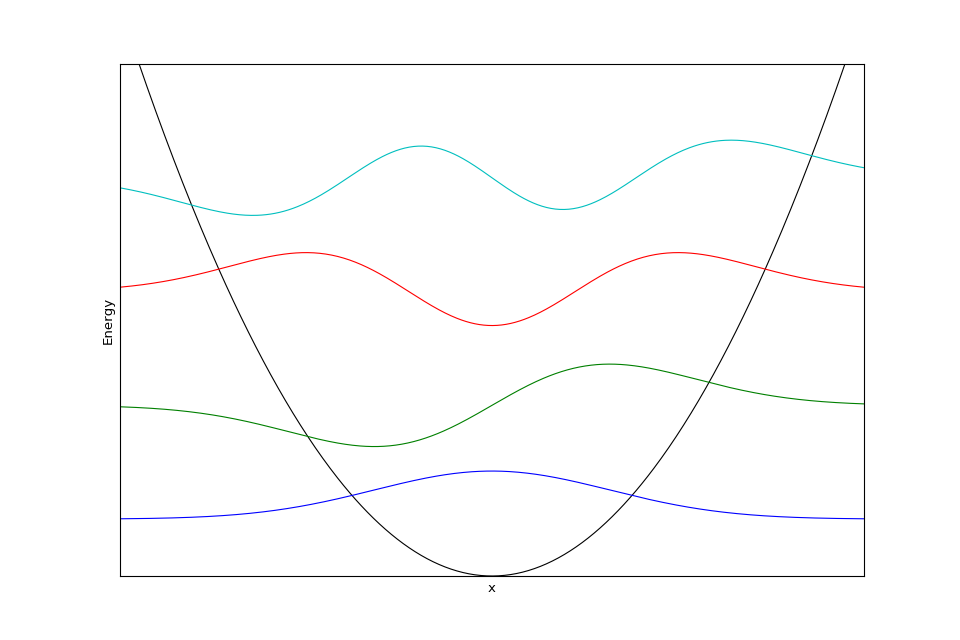

In [20]:
h_params = [0.5,2000.]
pm.plot_levels(harmonic_unperturb_wf,harmonic_unperturb_erg,harmonic_potential,
               h_params,x_lims = [-0.1,0.1], plot_zoom = [200])

Now it is time to define the perturbing potential $\hat{H}'$. This is simply a function of $x$ which returns the potential value at $x$. If statements can be used to define potentials which have different behaviour in different regions. 

In [21]:
def perturbation(x):
    return 1000.*x**4

First order energy shifts and perturbed wavefunctions for individual levels can be called via <i>first_order_energy_sft</i> and <i>first_order_wf</i> respectively. These return the energy shift as a float and perturbed wavefunction as a function of position. The first argument for both is the principle quantum number of the energy level in question. For <i>first_order_energy_sft</i> a list of principle quantum numbers can also be passed and a list of energy shifts will be output. The mandatory arguments are familiar. 

There are the additional optional arguments <i>limits</i> and <i>tolerance</i>. <i>limits</i> puts the limits on the expectation value and overlap integrals done for the first order energy shift and perturbed wavefunction calculations respectively. Tolerance sets the level at which additional terms in the perturbed wavefunction sum are discarded. If the fraction accompanying $|m^{(0)}\rangle$ is less than the tolerance the sum is truncated.

In [6]:
dE_0 = pm.first_order_energy_sft(0,perturbation,harmonic_unperturb_wf,h_params,limits = [-np.inf,np.inf])

perturb_1 = pm.first_order_wf(1,perturbation,harmonic_unperturb_wf,harmonic_unperturb_erg,
                              h_params,tolerance = 0.01,limits = [-np.inf,np.inf])

Performs a similar plot to <i>plot_levels</i> with the unperturbed wavefunctions with faint lines and the perturbed wavefunctions with solid lines. The perturbed wavefunctions origin is also shifted by the first order energy shift.

<i>plot_perturb</i> has the optional arguments <i>x_lims, tolerance, limits</i> and <i>plot_zoom</i>. The first 3 have the usual meaning given above. <i>plot_zoom</i> is a list with 2 element, the first of which scales the size of the wavefunction on the plot (default value is 200). The second element scales the factor by which the first order energy shift is increased so that it can be viewed on the plot (default value is 100)

<IPython.core.display.Javascript object>


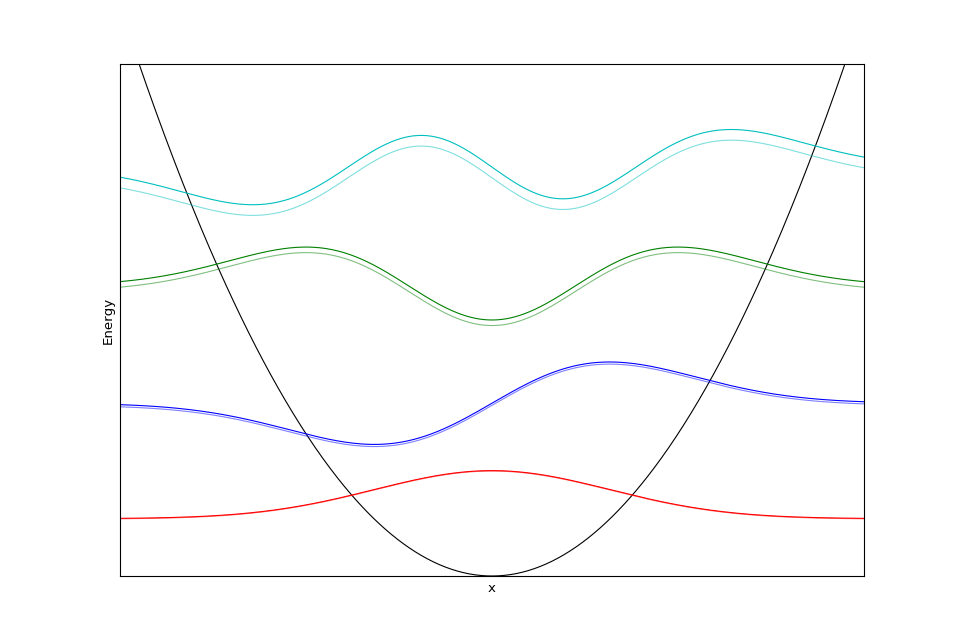

In [22]:
pm.plot_perturb(perturbation,harmonic_unperturb_wf,harmonic_unperturb_erg,harmonic_potential,
                h_params,tolerance = 0.01,plot_zoom = [200,10000])

### Exercises

1. For the harmonic potential, investigate linear and quadratic perturbations and higher order $x^n$. What do you notice about the first order energy shift as a function of $(n+1/2)$?
(Theoretical Exercise: Why do the shifts have the shown function form? Hint: use ladder operators)

2. For a square well with infintely high walls, write down the unperturbed wavefunctions and the unperturbed energies and create the required functions

3. Investigate a small step in potential near the centre of the well such that perturbation has the form:
\begin{align}
    V'(x) &= \epsilon \ \mbox{for} \ |x| < b/2
\end{align}
where $b \ll a$ where $a$ is the width of the well. Give the first order energy shift to the ground state and first excited state

4. Investigate a linear perturbation, $V'(x) \propto -x$, and give the first order energy shift to the ground state and first excited state. Now write a function to calculate the second order energy shift:
\begin{equation}
    \Delta E_n^{(2)} =  \sum_{m \neq n} \frac{\langle m^{(0)} | \hat{H}' | n^{(0)} \rangle}{E_n^{(0)}-E_m^{0}}
\end{equation}
Use [SciPy Quad](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) to calculate the matrix elements. You should truncate the sum when the terms become negligibly small. Why should you perform seperate sums for even and odd $m$? Find the second order energy shift for the ground and first excited states.

5. Use the optional argument <i>return_list = True</i> in <i>first_order_wf</i> to return a tuple containing (<i>perturbed_wf, k_list, I_list</i>). <i>k_list, I_list</i> contain a list of the principle quantum numbers and prefactors in the sum of the unperturbed states respectively. i.e.
\begin{equation}
    |n^{(1)}\rangle \approx |n^{(0)}\rangle + \sum_{k \in k_{list}} I_{list}[k] \ |k^{(0)}\rangle
\end{equation}
Use this to show the linear combination of states which creates the perturbed state (increasing the perturbation size makes this clearer). Also plot the perturbed wavefunction for the ground state, what is the interpretation of this?

6. With the system in the ground state of the perturbed system ($V'(x) \propto -x$), write down the time dependence once the perturbation is switched off (only consider the above expansion to first order in the sum). 

7. (Extra) Plot this evolution.